<a href="https://colab.research.google.com/github/catylyst/CS5233-UTSA/blob/main/CS5233_assignment4_nhw444.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTSA CS 5233: Assignment-4

**Martinez - Ricardo - (nhw444)**






## Learning Objectives

*   Deep Learning
*   Computer Vision - Convolutional Neural Network
*   Natural Language Processing - Recurrent Neural Network


## General Information

The base structure and comments are provided on what should be done. You are free to use any code from online sources, but please cite the source properly. Also, you are supposed to create/train the DL model and not use pre-trained models.

**TIPS** while working on this assignment:


*   You will have to keep on updating the model to improve accuracy. Hence, all except the first step (loading the data) would be repeated multiple times. i.e. repeat -- model creation, training & testing.
*   Training a Deep Learning model on real-world datasets and obtain decent accuracy is time consuming. For this assignment, it may take at least 40-60 min, if not more, to train the complete data and get around 35% testing accuracy. Hence, have enough time planned out for finishing the assignment.
*   Because of the large training time, it is impossisble to train each student's model. Hence, you will be required to **save the weights** in a file. These weights can then be loaded for testing purposes. More information is provided in a TensorFlow tutorial [here](https://www.tensorflow.org/tutorials/keras/save_and_load).
*   Please refer to the [TensorFlow Keras API](https://www.tensorflow.org/api_docs/python/tf/keras) for selecting the *'activation function', 'loss', 'optimizer' & 'metrics'*. At least use 'accuracy' as one of the 'metrics'.




##Import Libraries

Write all the import statements here.

In [ ]:
# importing all required libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import random
# from google.colab import drive
# drive.mount('/content/drive')



# Computer Vision - CNN

The goal of this task is to get hands-on experience in developing, training and testing **Convolutional Neural Network** for the Computer Vision task of Object/Image Classification.

## Load/Prepare Data

(20 points)

In this assignment, will work with the well-known **CIFAR-100 dataset**. The dataset consists of 60000 32x32 color images, which belong to 100 classes, with 600 images per class. There are 50000 training images (500 per class) and 10000 test images (100 per class). The 100 classes in the dataset are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs). More information about the dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html). Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

In this section, you will write code for the following:

*   Load the CIFAR-100 dataset
*   Prepare the data to be used for the DL model creation and training
*   Visualize the data by plotting 100 random images, one each for the 100 classes



In [ ]:
# Load the data - training as well as testing
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar100.load_data(label_mode='fine')

# Prepare the data that can be used by the next step - creating and training the DL model
# Normalize pixel values to range of [0,1]
train_images = train_images.astype('float') / 255.0
test_images = test_images.astype('float32') / 255.0

# print shapes to confirm loading of CIFAR-100
print(f"Training image data shape: {train_images.shape}")       # (50000, 32, 32, 3)
print(f"Training image labels shape: {train_labels.shape}")     # (50000, 1)
print(f"Test image data shape: {test_images.shape}")            # (10000, 32, 32, 3)
print(f"Test image labels shape: {test_labels.shape}")          # (10000, 1)




# The data from TensforFlow and Keras will only have integer class labels. Each of those 100 integer class labels correspond to the following names, in the correct order
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# These are the string labels for the 20 superclasses. You may not need to use this at all, just provided here for reference.
coarse_labels = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']



169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training image data shape: (50000, 32, 32, 3)
Training image labels shape: (50000, 1)
Test image data shape: (10000, 32, 32, 3)
Test image labels shape: (10000, 1)


In [ ]:
# Visualize the data by plotting 100 random images, one each for the 100 classes

# create list to store 100 rancom indices
selected_unique_indices  =[]

# track which classes have been used already
used_classes = set()

# Use while loop to continue collectiong indices until 100 different classes
while len(selected_unique_indices) < 100:
  # Select random index from training dataset
  idx = random.randint(0, len(train_labels) - 1)
  # Retrieve class label for index selected
  class_label = train_labels[idx].item() # int(train_labels[idx]) method was deprecated, reached out to a friend to found out how to correct with new methods
  # Use if to ensure not class_label isnt previously picked
  if class_label not in used_classes:
    used_classes.add(class_label)
    selected_unique_indices.append(idx)





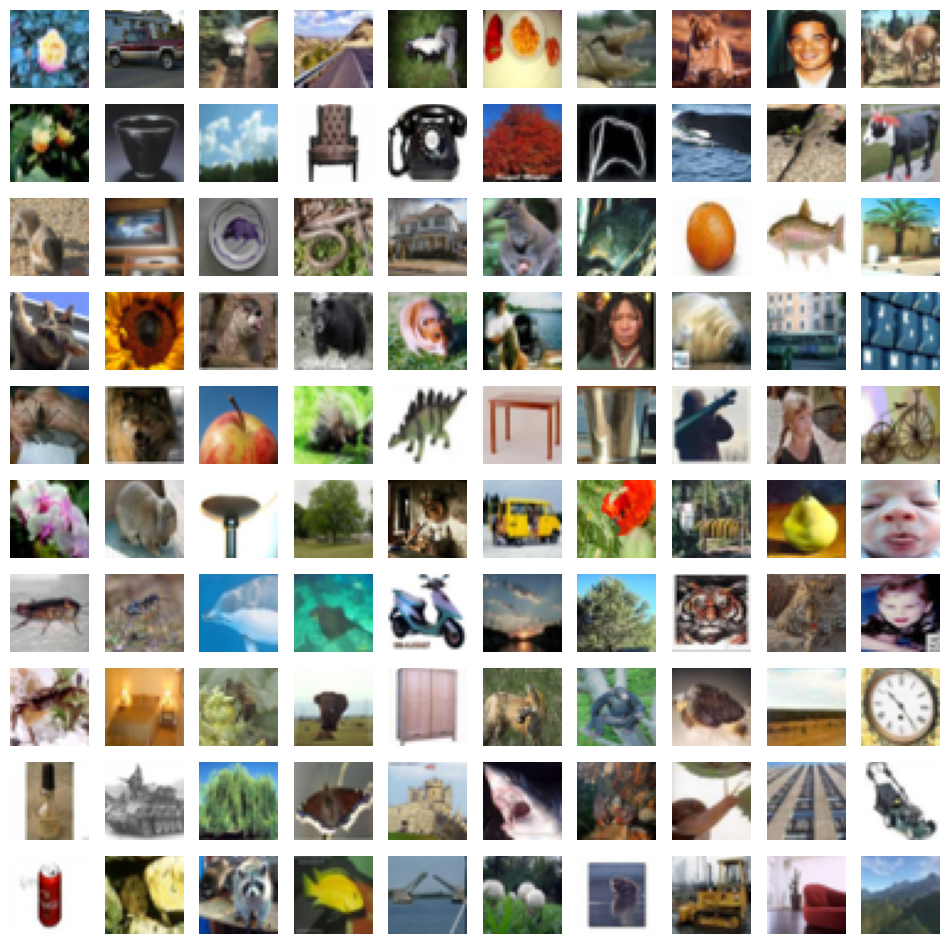

In [ ]:
# Draw 10 images in one row, 10 rows total
plt.figure(figsize=(12, 12)) # 12 inches x 12 inches
for i, idx in enumerate(selected_unique_indices):
  plt.subplot(10, 10, i + 1) # 10 rows, 10 columns, i+1 to start at 1 and not 0
  plt.imshow(train_images[idx]) # display image from dataset
  plt.axis("off") # remove axes, borders (removes grid marks)
plt.show() # output the 10 x 10 image and grid

## CNN Model Creation

(15 points)

In this section, you will write code for the following:

*   Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
*   Print the DL model summary

In [ ]:
# Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*,
# as shown in the example code in the lecture for 'deep-learning')

######################################################################
#
# Step 1: Create CNN Model
#
######################################################################
# reference "https://www.tensorflow.org/tutorials/images/cnn"

# Sequential model, stacking layers
model = keras.models.Sequential()

# --- Convolution and Pooling (1) --- #
model.add(keras.layers.Conv2D(
    filters=32,             # number of filters to learn
    kernel_size=(3,3),      # 3 by 3 convultion window
    activation='relu',      # nonlinear equation
    padding='same',         # maintain same size input  32 by 32
    input_shape=(32, 32, 3) # CIFAR-100 images 32 by 32 with 3 color RGB
))
# downsamples the input feature map by taking the maximum value in every (2x2) window
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# --- Convolution and Pooling (2) --- #
model.add(keras.layers.Conv2D(
    filters=64,
    kernel_size=(3, 3),
    activation='relu',
    padding='same'
))
# downsample reduced again to 8 x8
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


# --- Convolution and Pooling (3) --- #
model.add(keras.layers.Conv2D(
    filters=128,
    kernel_size=(3, 3),
    activation='relu',
    padding='same'
))
# down sampled again to 4 x 4
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Display architecture of model so far
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,248 (364.25 KB)

 Trainable params: 93,248 (364.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# --- Flatten and Add Dense Layers --- #

# Flatten 4 x 4 x128 feature maps to 1D vector for use in dense layer
model.add(keras.layers.Flatten())

# Dense Layer 256 neurons higher level learn combination features
model.add(keras.layers.Dense(256, activation='relu'))

# Dropouts use randomly turns off .5 of neurons while training in an efort to reduce overfitting
model.add(keras.layers.Dropout(0.5))

# --- Output Layer --- #
# Output layer using 100 ( one for each 100 CIFAR-100 classes)
model.add(keras.layers.Dense(100, activation='softmax'))

# Display architecture of model so far
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,492 (2.45 MB)

 Trainable params: 643,492 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
######################################################################
#
# Step 2: Compile the CNN Model
#
######################################################################
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # recommended to use if integers are between 0 and 99
    metrics=['accuracy']
)

In [ ]:
######################################################################
#
# Step 3: Print the CNN Model summary
#
######################################################################
# Print the DL model summary, layer by layer structure, parameters numbers and output shapes

model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,492 (2.45 MB)

 Trainable params: 643,492 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

## Training

(15 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training CIFAR-100 data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/", to be used for the testing phase


In [ ]:
######################################################################
#
# Step 4: Setup a checkpoint path in Google Drive
#
######################################################################
import os

# google Collab keeps trying to get my permissions and i refuse to get it so created the following

# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/"
checkpoint_dir = "/content/drive/My Drive/Colab Notebooks/cifar/"

# create folder if not exist
os.makedirs(checkpoint_dir, exist_ok=True)

# file path for weights file
checkpoint_path = os.path.join(checkpoint_dir, "cifar_cnn_weights.weights.h5")

# set cehkpoints to be saved in drive at location "/content/drive/My Drive/Colab Notebooks/cifar/"
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)






In [ ]:
######################################################################
#
# Step 5: Train/fit the DL model
#
######################################################################

# Train/fit the DL model using the training CIFAR-100 data
# set epochs
EPOCHS = 20

history = model.fit(
    train_images,
    train_labels,
    epochs=EPOCHS,
    batch_size=64,
    validation_data=(test_images, test_labels),
    callbacks=[checkpoint_callback],
    verbose=1
)



Epoch 1/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.0445 - loss: 4.2961
Epoch 1: val_accuracy improved from -inf to 0.18640, saving model to /content/drive/My Drive/Colab Notebooks/cifar/cifar_cnn_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 176ms/step - accuracy: 0.0446 - loss: 4.2955 - val_accuracy: 0.1864 - val_loss: 3.4443
Epoch 2/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.1574 - loss: 3.5157
Epoch 2: val_accuracy improved from 0.18640 to 0.25340, saving model to /content/drive/My Drive/Colab Notebooks/cifar/cifar_cnn_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 137s 175ms/step - accuracy: 0.1575 - loss: 3.5154 - val_accuracy: 0.2534 - val_loss: 3.0904
Epoch 3/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.2273 - loss: 3.1536
Epoch 3: val_accuracy improved from 0.25340 to 0.31240, saving model to /content/drive/My Drive/Colab Notebooks/cifar/cifar_cnn_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 172ms/step - accuracy:

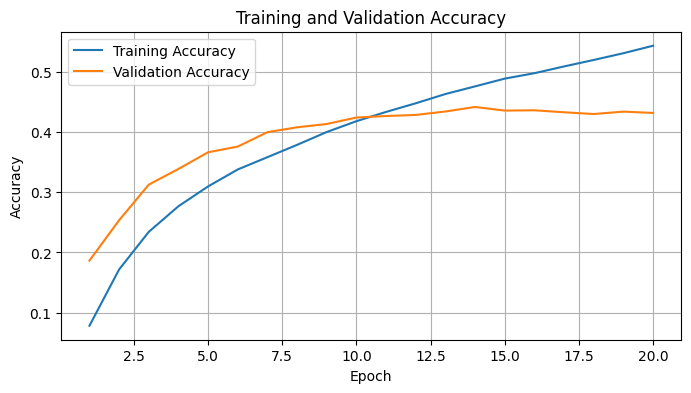

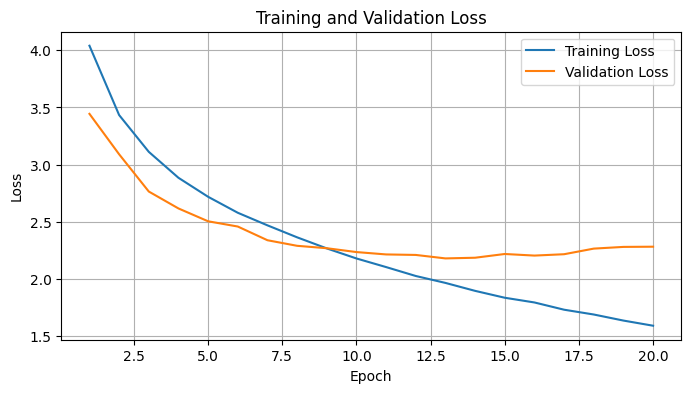

In [ ]:
######################################################################
#
# Step 6: Plot training/validation accuracy and loss
#
######################################################################
# referenced from same CNN as above
# Plot the training/validation accuracy and loss
acc = history.history['accuracy']          # training accuracy per epoch
val_acc = history.history['val_accuracy']  # validation accuracy per epoch
loss = history.history['loss']            # training loss per epoch
val_loss = history.history['val_loss']    # validation loss per epoch

epochs_range = range(1, len(acc) + 1) # x-axis: 1,2,3 .. epocjs

# --- Accruaracy plots --- #
plt.figure(figsize=(8, 4))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# --- Plot Loss --- #
plt.figure(figsize=(8, 4))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()









## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/cifar/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the CIFAR-100 test dataset. Accuracy value should be printed. Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

This section of the code should be able to run independently from the **training** section, i.e. run this section directly after creating the model.

In [ ]:
######################################################################
#
# Step 7: Re-initialize the CNN Model
#
######################################################################
# Re-initialize the model
reinit_model = keras.models.Sequential()

# --- Convolution Padding (1) --- #
reinit_model.add(keras.layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    activation='relu',
    padding='same',
    input_shape=(32, 32, 3) # CIFAR 100 Original image shape
))

reinit_model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# --- Convolution Padding (2) --- #
reinit_model.add(keras.layers.Conv2D(
    filters=64,
    kernel_size=(3, 3),
    activation='relu',
    padding='same'
))
reinit_model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# --- Convoution Padding (3) --- #
reinit_model.add(keras.layers.Conv2D(
    filters=128,
    kernel_size=(3, 3),
    activation='relu',
    padding='same'
))
reinit_model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# --- Flatten and Dense Layers --- #
reinit_model.add(keras.layers.Flatten())
reinit_model.add(keras.layers.Dense(256, activation='relu'))
reinit_model.add(keras.layers.Dropout(0.5))

# --- Output layers for CIFAR classes
reinit_model.add(keras.layers.Dense(100, activation='softmax'))


######################################################################
#
# Step 8: Compile the Re-initialized  CNN Model
#
######################################################################
reinit_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

reinit_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,492 (2.45 MB)

 Trainable params: 643,492 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
######################################################################
#
# Step 9: Define path and load saved weights
#
######################################################################
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/cifar/"
checkpoint_dir = "/content/drive/My Drive/Colab Notebooks/cifar/"

checkpoint_path = checkpoint_path = os.path.join(checkpoint_dir, "cifar_cnn_weights.weights.h5")

print(f"Weight loading from: {checkpoint_path}")

reinit_model.load_weights(checkpoint_path)

print(f"Succesfully loaded weights.")


Weight loading from: /content/drive/My Drive/Colab Notebooks/cifar/cifar_cnn_weights.weights.h5
Succesfully loaded weights.


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
######################################################################
#
# Step 10: Evaluate reinitilaized CNN model with CIFAR 100 dataset
#
######################################################################
# Evaluate the trained DL model on the CIFAR-100 test dataset
test_loss, test_accuracy = reinit_model.evaluate(test_images, test_labels, verbose=1)

print(f"Test Loss: {test_loss:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.4464 - loss: 2.1714
Test Loss: 2.185
Test Accuracy: 0.441


# Natural Language Processing - RNN

The goal of this task is to get hands-on experience in developing, training and testing **Recurrent Neural Network** for the Natural Language Processing task of Sentiment Analysis / Text Classification. In this part, you will work with the well-known **Reuters newswire classification dataset**. The dataset consists of newswires from Reuters, labeled over 46 topics. More information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection) or [here](https://keras.io/api/datasets/reuters/). The Keras dataset is a cleaned and organized version of the original dataset and consists of 11,228 newswires (8982 training and 2246 testing). The goal is to classify a newswire into one of the 46 output catergories.


## Load/Prepare Data

(15 points)

In this section, you will write code for the following:

*   Load the Reuters dataset - use the Keras version
 *   Select the vocabulary size while loading the data
 *   The data will be loaded as integer representations for each word
*   Prepare the data to be used for the next steps
 *   Each data entry (newswire) can be of different lengths
 *   Make each newswire consistent - same number of words
 *   'Pad' words (say 0) to get to the standard length or remove words

In [ ]:
# Load the Reuters dataset - use the Keras version
#   Select the vocabulary size while loading the data
#   The data will be loaded as integer representations for each word

######################################################################
#
# Step 1: Select vocabulary size
#
######################################################################

# `https://keras.io/api/datasets/reuters/` reccomended to use top 10,000
vocab_size = 10000

######################################################################
#
# Step 2: Load Reuters data set
#
######################################################################

from tensorflow import keras

(train_sequences, train_labels), (test_sequences, test_labels) = keras.datasets.reuters.load_data(
    num_words=vocab_size
)

print(f"Number of Training samples: {len(train_sequences)}")
print(f"Number of testing samples: {len(test_sequences)}")


2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Number of Training samples: 8982
Number of testing samples: 2246


In [ ]:

######################################################################
#
# Step 3: Select sequence length
#
######################################################################
maxlen = 200 # 200 selected as 75% of the samples are below 200 and should be fast in google collab

# Prepare the data to be used for the next steps
#   Each data entry (newswire) can be of different lengths
#   Make each newswire consistent - same number of words
#   'Pad' words (say 0) to get to the standard length or remove words

######################################################################
#
# Step 4: Pad/Truncate sequence as needed
#
######################################################################

# Padding with 0's and setting max length 200
x_train = keras.utils.pad_sequences(
    train_sequences,
    maxlen=maxlen,
    padding='pre',
    truncating='pre',
    value=0
)

x_test = keras.utils.pad_sequences(
    test_sequences,
    maxlen=maxlen,
    padding='pre',
    truncating='pre',
    value=0
)

# check for correct changes
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Sample first padded sequence: {x_train[0][:20]}")


Shape of x_train: (8982, 200)
Shape of x_test: (2246, 200)
Sample first padded sequence: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## RNN Model Creation

(15 points)

In this section, you will write code for the following:

*   Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
*   Print the DL model summary

In [ ]:
# Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU

######################################################################
#
# Step 5: Create RNN model
#
######################################################################
embedding_dim = 64
vocab_size = 10000
maxlen = 200

# Stack layers
model = keras.models.Sequential()

# --- Embedding Layers --- #
model.add(keras.layers.Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    input_length=maxlen
))

# --- LTST: recurrent layer --- #
model.add(keras.layers.LSTM(
    64 # number of internal units (memory cells: LSTM units)
))

# --- regularization to prevent overfitting --- #
model.add(keras.layers.Dropout(0.5))

# ---  output layer: dense Layer --- #
model.add(keras.layers.Dense(
    46,
    activation='softmax'
))

######################################################################
#
# Step 6: Compile the RNN model
#
######################################################################

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
######################################################################
#
# Step 7: Print the DL model Summary
#
######################################################################
model.build(input_shape=(None, maxlen))
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 676,014 (2.58 MB)

 Trainable params: 676,014 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

## Training

(15 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training Reuters data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load)), to be used for the testing phase


In [ ]:
######################################################################
#
# Step 8: Set the model checkpoints to be saved in a folder
#
######################################################################

# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/"
checkpoint_dir_reuters = "/content/drive/My Drive/Colab Notebooks/reuters/"

# Create the folder if it does not exist.
os.makedirs(checkpoint_dir_reuters, exist_ok=True)

# file path for the weights file
checkpoint_path_reuters = os.path.join(
    checkpoint_dir_reuters,
    "reuters_rnn_weights.weights.h5"
)

checkpoint_callback_reuters = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path_reuters,       # location to save weights
    save_weights_only=True,                 # Save only weights
    save_best_only=True,                    # keep only bbes model values
    monitor='val_accuracy',                 # select metric
    mode='max',
    verbose=1                               # print message when saved
)

print(f"Checkpoint path: {checkpoint_path_reuters}")




Checkpoint path: /content/drive/My Drive/Colab Notebooks/reuters/reuters_rnn_weights.weights.h5


In [ ]:
######################################################################
#
# Step 9: Train/fit the RNN model, using the training Reuters data
#
######################################################################

# Epochs 20 / Batch size 64
EPOCHS = 20
BATCH_SIZE = 64

history_reuters = model.fit(
    x_train,
    train_labels,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_test, test_labels),
    callbacks=[checkpoint_callback_reuters],
    verbose=1
)





Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.3069 - loss: 3.0456
Epoch 1: val_accuracy improved from -inf to 0.47507, saving model to /content/drive/My Drive/Colab Notebooks/reuters/reuters_rnn_weights.weights.h5
141/141 ━━━━━━━━━━━━━━━━━━━━ 27s 180ms/step - accuracy: 0.3072 - loss: 3.0429 - val_accuracy: 0.4751 - val_loss: 2.0963
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.4686 - loss: 2.0973
Epoch 2: val_accuracy improved from 0.47507 to 0.52137, saving model to /content/drive/My Drive/Colab Notebooks/reuters/reuters_rnn_weights.weights.h5
141/141 ━━━━━━━━━━━━━━━━━━━━ 39s 169ms/step - accuracy: 0.4686 - loss: 2.0969 - val_accuracy: 0.5214 - val_loss: 1.9720
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.5028 - loss: 2.0197
Epoch 3: val_accuracy improved from 0.52137 to 0.54230, saving model to /content/drive/My Drive/Colab Notebooks/reuters/reuters_rnn_weights.weights.h5
141/141 ━━━━━━━━━━━━━━━━━━━━ 24s 169ms/step - 

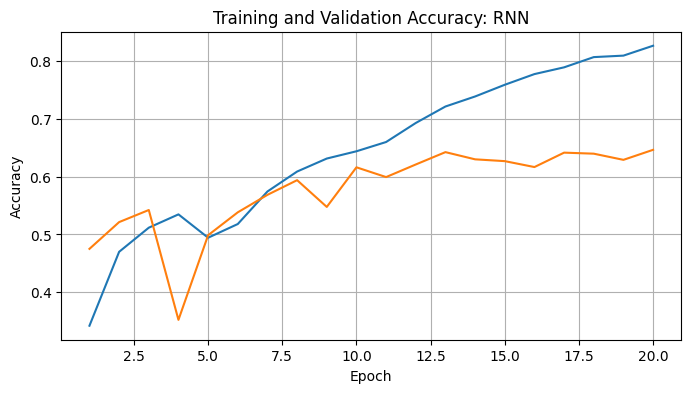

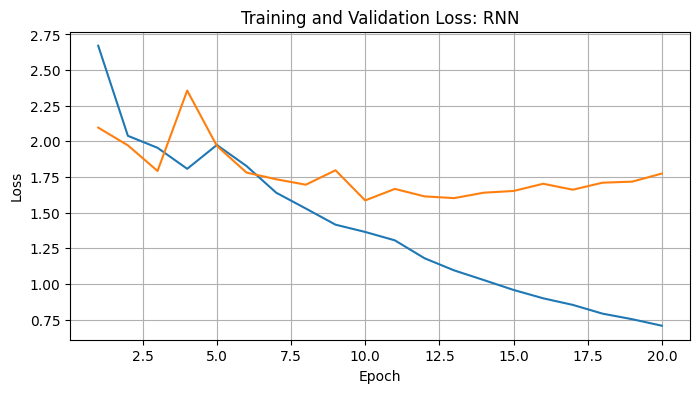

In [ ]:
######################################################################
#
# Step 10: Plot the training/validation accuracy and loss
#
######################################################################

acc = history_reuters.history['accuracy']
val_acc = history_reuters.history['val_accuracy']
loss = history_reuters.history['loss']
val_loss = history_reuters.history['val_loss']

epochs_range = range(1, len(acc) + 1)


# --- Plot accuracy vs epoch --- #
plt.figure(figsize=(8,4))
plt.plot(
    epochs_range,
    acc,
    label='Training Accuracy'
    )
plt.plot(
    epochs_range,
    val_acc,
    label='Validation Accuracy'
    )
plt.title('Training and Validation Accuracy: RNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# --- Plot loss vs epoch --- #
plt.figure(figsize=(8,4))
plt.plot(
    epochs_range,
    loss,
    label='Training Loss'
    )
plt.plot(
    epochs_range,
    val_loss,
    label='Validation Loss'
    )
plt.title('Training and Validation Loss: RNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()



## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the Reuters test dataset. Accuracy value should be printed.

This section of the code should be able to run independently from the **training** section, i.e., run this section directly after creating the model.

In [ ]:
######################################################################
#
# Step 11: Reinitialize the model
#
######################################################################

reuters_model = keras.models.Sequential()

# --- Embedding Layer --- #
reuters_model.add(keras.layers.Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    input_length=maxlen
))


# --- LSTM layer --- #
reuters_model.add(keras.layers.LSTM(64))

# --- dropout regularization --- #
reuters_model.add(keras.layers.Dropout(0.5))

# --- Output Layer -- #
reuters_model.add(keras.layers.Dense(46, activation='softmax'))

######################################################################
#
# Step 12: Compile reinitialized model
#
######################################################################

reuters_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


reuters_model.build(input_shape=(None, maxlen))

reuters_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 676,014 (2.58 MB)

 Trainable params: 676,014 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

######################################################################
#
# Step 12: Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/reuters/"
#
######################################################################
checkpoint_dir_reuters = "/content/drive/My Drive/Colab Notebooks/reuters/"
checkpoint_path_reuters = os.path.join(
    checkpoint_dir_reuters,
    "reuters_rnn_weights.weights.h5"
)

print(f"Loading from: {checkpoint_path_reuters}")

reuters_model.load_weights(checkpoint_path_reuters)

print("Succesfully loaded weights.")

Loading from: /content/drive/My Drive/Colab Notebooks/reuters/reuters_rnn_weights.weights.h5
Succesfully loaded weights.


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Evaluate the trained DL model on the Reuters test dataset

######################################################################
#
# Step 13: Evaluate the trained DL model on the Reuters test dataset
#
######################################################################

test_loss, test_accuracy = reuters_model.evaluate(
    x_test,
    test_labels,
    verbose=1
    )

print(f"Test loss: {test_loss:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6555 - loss: 1.7292
Test loss: 1.774
Test Accuracy: 0.646


# Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Download and zip the folders "/content/drive/My Drive/Colab Notebooks/cifar/" (abc123_cifar_model.zip) and "/content/drive/My Drive/Colab Notebooks/reuters/" (abc123_reuters_model.zip)
4.   Upload the .ipynb file and .zip on Blackboard



## Rubric

*   Computer Vision - CNN
    *   (20 points) Load/Prepare Data
    *   (15 points) CNN Model Creation
    *   (15 points) Training
    *   (15 points) Testing/Evaluation
*   Natural Language Processing - RNN
    *   (15 points) Load/Prepare Data
    *   (15 points) RNN Model Creation
    *   (15 points) Training
    *   (15 points) Testing/Evaluation

